In [ ]:
%matplotlib inline

In [1]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
################settings
#rundir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/6CanESM5/AMOC/';os.chdir(rundir)

registering cmaps
registering cmaps


1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [4]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG1_GMST+AMOC/';os.chdir(rundir)
srcdir_base='/space/hall4/sitestore/eccc/crd/ccrn/users/cmr203/ncconv/netcdfconv'    
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/amoc_stab_post'

do_calc=False
varnm='msftmyz'
if do_calc:
    os.system('mkdir -p {}/DATA_{}_canesm5'.format(datadir,varnm))
    os.chdir('{}/DATA_{}_canesm5'.format(datadir,varnm))
    os.system('/bin/rm *.nc')

    # all historical 
    #os.system('ln -s ' + srcdir_base +'')
    os.system('ln -s ' + srcdir_base +'/pre-final/*/*/*/*/esm-1pctCO2/*/*/msftmz/*/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/p2-zec750*/*/*/*/*/*/*/*/msftmz/*/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/final/*/*/*/*/esm-1pct-brch-1000PgC/*/*/msftmz/*/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/p2-zec1500*/*/*/*/*/*/*/*/msftmz/*/*/*.nc .')
    # concat
    ens_his = rut.cd_mkensemble('*esm-1pctCO2*',mip='cmip6')
    ens_his = cd.cat_exp_slices(ens_his)
    ens_15c = rut.cd_mkensemble('*esm-1pct-brch-750PgC*',mip='cmip6')    
    ens_15c = cd.cat_exp_slices(ens_15c)
    ens_20c = rut.cd_mkensemble('*esm-1pct-brch-1000PgC*',mip='cmip6')
    ens_20c = cd.cat_exp_slices(ens_20c)
    ens_30c = rut.cd_mkensemble('*esm-1pct-brch-1500PgC*',mip='cmip6')
    ens_30c = cd.cat_exp_slices(ens_30c)

    print 'Calculating annual mean psi'
    # annual means            
    my_cdo_str='cdo -yearmean {infile} {outfile}' 
    ens_his=cd.my_operator(ens_his, my_cdo_str, output_prefix='am_',delete=True)
    ens_15c=cd.my_operator(ens_15c, my_cdo_str, output_prefix='am_',delete=True)
    ens_20c=cd.my_operator(ens_20c, my_cdo_str, output_prefix='am_',delete=True)
    ens_30c=cd.my_operator(ens_30c, my_cdo_str, output_prefix='am_',delete=True)

    print 'Select NH'
    # 20-90N            
    my_ncks_str='ncks -d basin,0 -d lat,181,289 {infile} {outfile}' ; prefix='nh_'
    ens_his=cd.my_operator(ens_his, my_ncks_str, output_prefix='nh_',delete=True)
    ens_15c=cd.my_operator(ens_15c, my_ncks_str, output_prefix='nh_',delete=True)
    ens_20c=cd.my_operator(ens_20c, my_ncks_str, output_prefix='nh_',delete=True)
    ens_30c=cd.my_operator(ens_30c, my_ncks_str, output_prefix='nh_',delete=True)

    print 'Calculate AMOC'
    # Max, and convert from mass (kg/s to volume [Sv])            
    my_cdo_str='cdo -fldmax {infile} {outfile}' ; prefix='c_'
    ens_his=cd.my_operator(ens_his, my_cdo_str, output_prefix=prefix,delete=True)
    ens_15c=cd.my_operator(ens_15c, my_cdo_str, output_prefix=prefix,delete=True)
    ens_20c=cd.my_operator(ens_20c, my_cdo_str, output_prefix=prefix,delete=True)
    ens_30c=cd.my_operator(ens_30c, my_cdo_str, output_prefix=prefix,delete=True)

    my_cdo_str='cdo -vertmax {infile} {outfile}' ; prefix='o'
    ens_his=cd.my_operator(ens_his, my_cdo_str, output_prefix=prefix,delete=True)
    ens_15c=cd.my_operator(ens_15c, my_cdo_str, output_prefix=prefix,delete=True)
    ens_20c=cd.my_operator(ens_20c, my_cdo_str, output_prefix=prefix,delete=True)
    ens_30c=cd.my_operator(ens_30c, my_cdo_str, output_prefix=prefix,delete=True)

    my_cdo_str='cdo -divc,1.025e9 {infile} {outfile}' ; prefix='am'
    ens_his=cd.my_operator(ens_his, my_cdo_str, output_prefix=prefix,delete=True)
    ens_15c=cd.my_operator(ens_15c, my_cdo_str, output_prefix=prefix,delete=True)
    ens_20c=cd.my_operator(ens_20c, my_cdo_str, output_prefix=prefix,delete=True)
    ens_30c=cd.my_operator(ens_30c, my_cdo_str, output_prefix=prefix,delete=True)
 
else:
    os.chdir('{}/DATA_{}_canesm5'.format(datadir,varnm))
    ens_his=rut.cd_mkensemble('amoc_nh_am_*_esm-1pctCO2*',prefix='amoc_nh_am_',mip='cmip6')
    ens_15c=rut.cd_mkensemble('amoc_nh_am_*_esm-1pct-brch-750PgC*',prefix='amoc_nh_am_',mip='cmip6')
    ens_20c=rut.cd_mkensemble('amoc_nh_am_*_esm-1pct-brch-1000PgC*',prefix='amoc_nh_am_',mip='cmip6')
    ens_30c=rut.cd_mkensemble('amoc_nh_am_*_esm-1pct-brch-1500PgC*',prefix='amoc_nh_am_',mip='cmip6')


amoc_his=cd.loadfiles(ens_his,'msftmz')['data']
amoc_15c=cd.loadfiles(ens_15c,'msftmz')['data']
amoc_20c=cd.loadfiles(ens_20c,'msftmz')['data']
amoc_30c=cd.loadfiles(ens_30c,'msftmz')['data']

os.chdir(rundir)


This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 



2. Plot
#####################################################

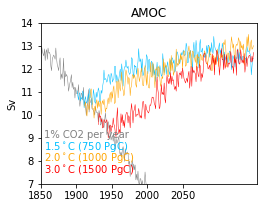

In [5]:
fig1, ax = plt.subplots(1,1, figsize=(8,8)); 
fig1.subplots_adjust(bottom=0.6,right=0.5,hspace=0.3,wspace=0.25)

####### years    
years_his=np.arange(1850,2000+1)
years_15c=np.arange(1901,2150+1)
years_20c=np.arange(1911,2150+1)
years_30c=np.arange(1931,2150+1)

####### stats    
 
# Axis 
ax.set_xlim([1850, 2155]) 
ax.set_xticks(np.arange(1850,2100,50))
ax.set_ylim([7, 14])
ax.set_ylabel('Sv')
    
####### plot
##his##
kwargs={'linewidth': 0.5, 'color': 'gray'}
ax.plot(years_his,np.mean(amoc_his,axis=0),**kwargs)                                    
##15c##
kwargs={'linewidth': 0.5, 'color': 'deepskyblue'}
ax.plot(years_15c,np.mean(amoc_15c,axis=0),**kwargs)                                    

##20c##
kwargs={'linewidth': 0.5, 'color': 'orange'}
ax.plot(years_20c,np.mean(amoc_20c,axis=0),**kwargs)

##30c##
kwargs={'linewidth': 0.5, 'color': 'red'}
ax.plot(years_30c,np.mean(amoc_30c,axis=0),**kwargs)


##legend##
ax.text(1855,9,'1% CO2 per year',color= 'gray')
ax.text(1855,8.5,'1.5$^\circ$C (750 PgC)',color= 'deepskyblue')
ax.text(1855,8,'2.0$^\circ$C (1000 PgC)',color= 'orange')
ax.text(1855,7.5,'3.0$^\circ$C (1500 PgC)',color= 'red')

# plots=====================================
#
rpl.add_title(ax,'AMOC')
rpl.mysavefig(fig1,'PLOTS/AMOC_CanESM5.png')













